<b><h2> CROP YIELD PREDICTION IN INDIA </h2></b>

In [28]:
# importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
crop_data=pd.read_csv("../ML/Dataset Processed/crop_production_cleaned.csv")
crop_data

,District_Name,Year,State_Name,Season,Crop,Area,Production,Rainfall,Yield,Temperature
0,Adilabad,2001,Telangana,Rabi,Sunflower,700.0,300.0,103.4,0.428571,24.191500
1,Adilabad,2001,Telangana,Rabi,Urad,700.0,300.0,103.4,0.428571,24.191500
2,Adilabad,2001,Telangana,Rabi,Wheat,2800.0,1600.0,103.4,0.571429,24.191500
3,Adilabad,2001,Telangana,Whole Year,Sugarcane,300.0,28800.0,1322.4,96.000000,27.897667
4,Adilabad,2001,Telangana,Whole Year,Tobacco,200.0,400.0,1322.4,2.000000,27.897667
...,...,...,...,...,...,...,...,...,...,...
164803,Zunheboto,2017,Nagaland,Kharif,Maize,10090.0,19950.0,1056.6,1.977205,22.526667
164804,Zunheboto,2017,Nagaland,Kharif,Mesta,210.0,220.0,1056.6,1.047619,22.526667
164805,Zunheboto,2017,Nagaland,Kharif,Moong(Green Gram),20.0,20.0,1056.6,1.000000,22.526667
164806,Zunheboto,2017,Nagaland,Kharif,Oilseeds total,8170.0,10170.0,1056.6,1.244798,22.526667


In [30]:
crop_data.shape

(164808, 10)

In [31]:
crop_data.columns

Index(['District_Name', 'Year', 'State_Name', 'Season', 'Crop', 'Area',
       'Production', 'Rainfall', 'Yield', 'Temperature'],
      dtype='object')

In [32]:
crop_data.describe()

,Year,Area,Production,Rainfall,Yield,Temperature
count,164808.000000,1.648080e+05,1.648080e+05,164808.000000,164808.000000,164808.000000
mean,2008.762760,1.263807e+04,2.140375e+05,548.103371,36.260204,25.503341
std,4.722639,3.955953e+04,8.751446e+06,516.775988,832.385199,3.452791
min,2001.000000,5.000000e-01,0.000000e+00,0.000000,0.000000,-0.873750
25%,2005.000000,8.600000e+01,8.600000e+01,123.800000,0.500000,23.158750
50%,2009.000000,6.430000e+02,7.540000e+02,442.500000,1.000000,26.524000
75%,2013.000000,4.947000e+03,7.400000e+03,826.900000,2.285714,28.087877
max,2018.000000,1.020181e+06,1.250800e+09,4878.300000,88000.000000,32.618750


In [33]:
crop_data.isnull().sum()

District_Name    0
Year             0
State_Name       0
Season           0
Crop             0
Area             0
Production       0
Rainfall         0
Yield            0
Temperature      0
dtype: int64

In [34]:
data = crop_data.drop(['State_Name'], axis = 1)

In [35]:
data.corr(numeric_only=True)

,Year,Area,Production,Rainfall,Yield,Temperature
Year,1.000000,-0.004339,0.011605,-0.081892,0.013196,-0.002478
Area,-0.004339,1.000000,0.022484,-0.094853,-0.007417,-0.052841
Production,0.011605,0.022484,1.000000,0.024372,0.316388,0.023721
Rainfall,-0.081892,-0.094853,0.024372,1.000000,0.060400,0.411663
Yield,0.013196,-0.007417,0.316388,0.060400,1.000000,0.034362
Temperature,-0.002478,-0.052841,0.023721,0.411663,0.034362,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

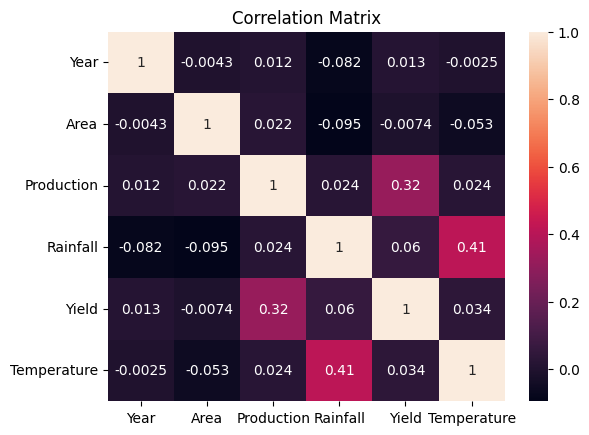

In [36]:
sns.heatmap(data.corr(numeric_only=True), annot =True)
plt.title('Correlation Matrix')

In [37]:
dummy = pd.get_dummies(data)
dummy


,Year,Area,Production,Rainfall,Yield,Temperature,District_Name_Adilabad,District_Name_Agra,District_Name_Ahmadabad,District_Name_Ajmer,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,2001,700.0,300.0,103.4,0.428571,24.191500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,700.0,300.0,103.4,0.428571,24.191500,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2001,2800.0,1600.0,103.4,0.571429,24.191500,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2001,300.0,28800.0,1322.4,96.000000,27.897667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2001,200.0,400.0,1322.4,2.000000,27.897667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164803,2017,10090.0,19950.0,1056.6,1.977205,22.526667,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164804,2017,210.0,220.0,1056.6,1.047619,22.526667,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164805,2017,20.0,20.0,1056.6,1.000000,22.526667,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164806,2017,8170.0,10170.0,1056.6,1.244798,22.526667,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<b><i> Splitting dataset into train and test dataset </i></b>

In [38]:

from sklearn.model_selection import train_test_split

x = dummy.drop(["Production","Yield"], axis=1)
y = dummy["Production"]

# Splitting data set - 25% test dataset and 75% 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=5)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (123606, 537)
x_test : (41202, 537)
y_train : (123606,)
y_test : (41202,)


In [39]:
print(x_train.head())
print(y_train.head())

        Year     Area  Rainfall  Temperature  District_Name_Adilabad  \
135357  2010     36.0     147.2     25.72200                       0   
82200   2012    117.0     355.7     29.13125                       0   
52623   2013  21503.0     301.2     27.60900                       0   
51564   2005    428.0     123.8     30.24125                       0   
91658   2008    670.0     327.2     24.58175                       0   

        District_Name_Agra  District_Name_Ahmadabad  District_Name_Ajmer  \
135357                   0                        0                    0   
82200                    0                        0                    0   
52623                    0                        0                    0   
51564                    0                        0                    0   
91658                    0                        0                    0   

        District_Name_Akola  District_Name_Aligarh  ...  Crop_Turmeric  \
135357                    0         

<b><h3> Linear Regression </b></h3>

In [40]:
# Training the Simple Linear Regression model .

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [41]:
# Predicting the test Results 

lr_predict = model.predict(x_test)
lr_predict

array([  28168.51171875,  307049.68554688,  -93118.52539062, ...,
        -78694.88476562,  -47256.96484375, -230251.75585938])

In [42]:
model.score(x_test,y_test)

0.0523219756049389

In [43]:
from sklearn.metrics import r2_score
r = r2_score(y_test,lr_predict)
print("R2 score : ",r)

R2 score :  0.0523219756049389


Text(0.5, 1.0, 'Linear Regression')

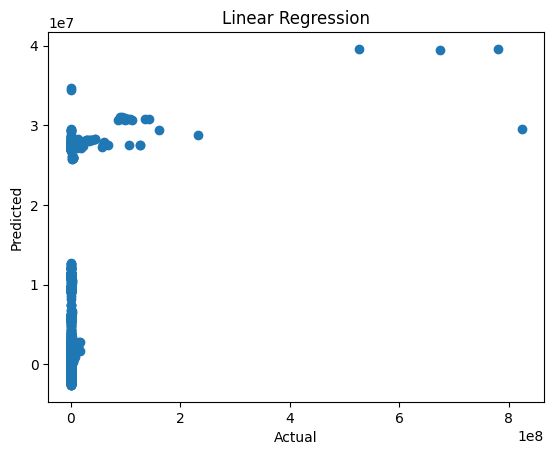

In [44]:
plt.scatter(y_test,lr_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

Clearly, the dataset is not good for linear regression.


<b><h3> Random Forest Algorithm </h3></b>

In [54]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 11)
model.fit(x_train,y_train)
rf_predict_train = model.predict(x_train)
rf_predict = model.predict(x_test)
rf_predict

array([41696.90909091,   430.25454545,    72.36363636, ...,
        5012.27272727,  1152.36363636, 22517.09090909])

In [55]:
model.score(x_test,y_test)

0.8440130307566962

In [48]:
from sklearn.metrics import r2_score
r1 = r2_score(y_train,rf_predict_train)
print("R2 score : ",r1)

R2 score :  0.9483713096619195


In [49]:
from sklearn.metrics import r2_score
r1 = r2_score(y_test,rf_predict)
print("R2 score : ",r1)

R2 score :  0.9834028452258811


In [28]:
Adjr2_1 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

Adj. R-Squared : 0.039807144326654775


<b> Comparison between Linear Regression Algorithm and Random Forest Algorithm </b> 



1. Linear regression algorithm is not at all accurate for this kind of prediction.
2. Random Forest Algorithm has higher accuracy ( between 85 % to 90% ), but it is slow.

<b> Support Vector Regression </b> 

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [35]:
print(x_train)
print(x_test)

[[ 0.26215628 -0.31893756 -0.77804044 ... -0.00752561 -0.01776565
  -0.04756341]
 [ 0.68603005 -0.31687814 -0.37362157 ... -0.00752561 -0.01776565
  -0.04756341]
 [ 0.89796693  0.22686123 -0.47933297 ... -0.00752561 -0.01776565
  -0.04756341]
 ...
 [-1.22140189 -0.31911554  0.1741381  ... -0.00752561 -0.01776565
  -0.04756341]
 [ 1.10990382 -0.21583913  0.97948445 ... -0.00752561 -0.01776565
  -0.04756341]
 [-1.22140189 -0.22389886 -0.19265139 ... -0.00752561 -0.01776565
  -0.04756341]]
[[-0.79443547  1.19572635  0.3475169  ... -0.00696733 -0.01970993
  -0.04907732]
 [-0.16089832 -0.28692546 -0.86997008 ... -0.00696733 -0.01970993
  -0.04907732]
 [-1.42797261 -0.3158304  -1.02061872 ... -0.00696733 -0.01970993
  -0.04907732]
 ...
 [-1.63915166 -0.15781011 -1.0519398  ... -0.00696733 -0.01970993
  -0.04907732]
 [-0.79443547 -0.26654537 -0.59519003 ... -0.00696733 -0.01970993
  -0.04907732]
 [-1.42797261  0.28404026  0.56234493 ... -0.00696733 -0.01970993
  -0.04907732]]


In [16]:
# Training the SVR model 

from sklearn.svm import SVR 
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train,y_train)

In [ ]:
# Predicting Result

svr_predict = regressor.predict(x_test)
svr_predict

In [ ]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(svr_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Support Vector Regression')

<b> Decision Tree </b>

In [16]:
# Training model 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 5)
regressor.fit(x_train,y_train)

# Predicting results
decisiontree_predict = regressor.predict(x_test)
decisiontree_predict

array([44532.,   737.,    57., ...,  6437.,  1429., 16033.])

In [17]:
regressor.score(x_test,y_test)

0.9441493805662039

In [18]:
# Calculating R2 score :

from sklearn.metrics import r2_score
r2 = r2_score(y_test,decisiontree_predict)
print("R2 score : ",r2)

R2 score :  0.9441493805662039


In [29]:
# Calculating Adj. R2 score: 

Adjr2_2 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_2))

Adj. R-Squared : 0.039807144326654775


<b> Cross-validation </b> 

In [33]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = x_train, y=y_train, cv = 10)

In [45]:
a1 = (accuracies.mean()*100)
b1 = (accuracies.std()*100)

In [47]:
print("Accuracy : {:.2f}%".format (a1))
print("Standard Deviation : {:.2f}%".format(b1))

Accuracy : 89.80%
Standard Deviation : 5.99%


In [48]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = x_train, y=y_train)

In [49]:
a2 = (accuracies.mean()*100)
b2 = (accuracies.std()*100)

In [50]:
print("Accuracy : {:.2f}%".format (accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 89.80%
Standard Deviation : 5.99%


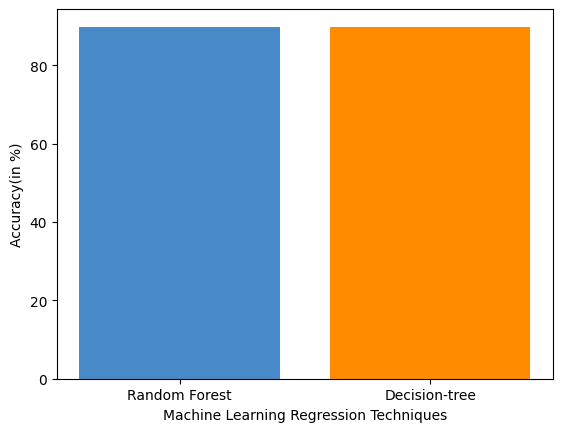

In [51]:
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [a1, a2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Accuracy(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()

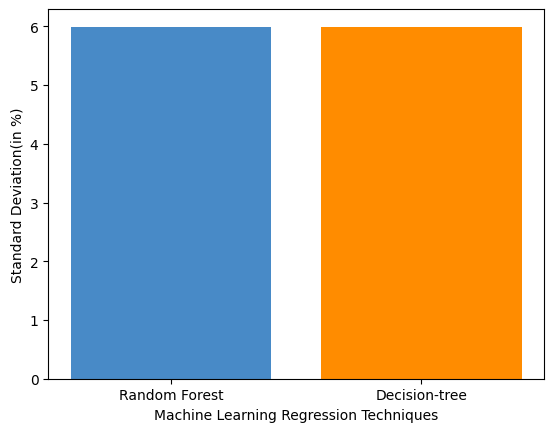

<Figure size 640x480 with 0 Axes>

In [52]:
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [b1, b2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Standard Deviation(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')

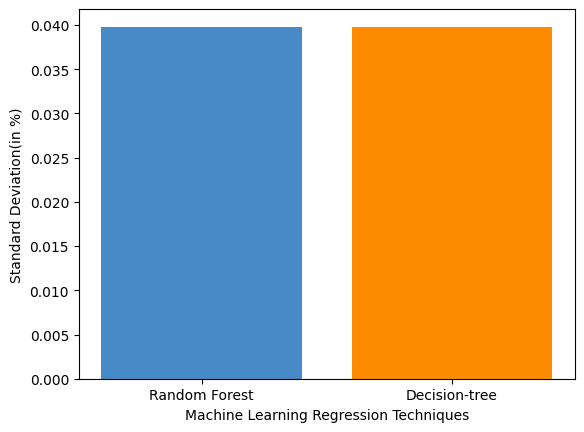

<Figure size 640x480 with 0 Axes>

In [53]:
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [Adjr2_1, Adjr2_2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Standard Deviation(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')

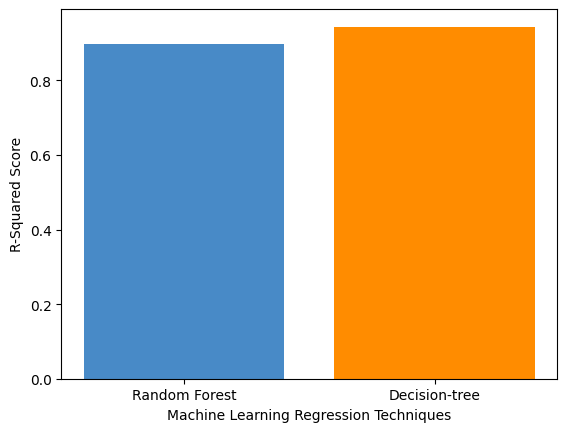

<Figure size 640x480 with 0 Axes>

In [54]:
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [r1, r2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('R-Squared Score')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')

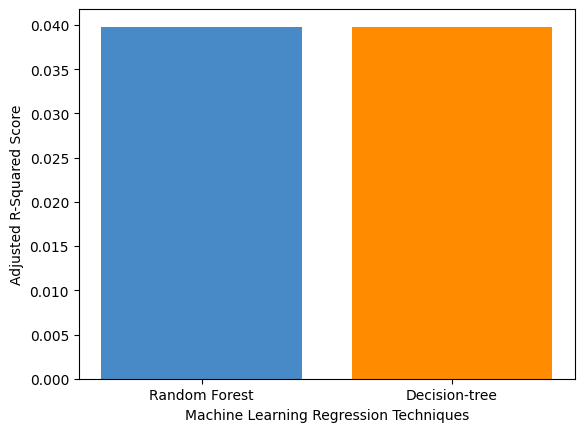

<Figure size 640x480 with 0 Axes>

In [55]:
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [Adjr2_1, Adjr2_2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Adjusted R-Squared Score')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')

In [56]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(rf_predict,y_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_predict)))

Mean Absolute Error: 52366.6360389831
Mean Squared Error: 5708485763746.414
Root Mean Squared Error: 2389243.763986089


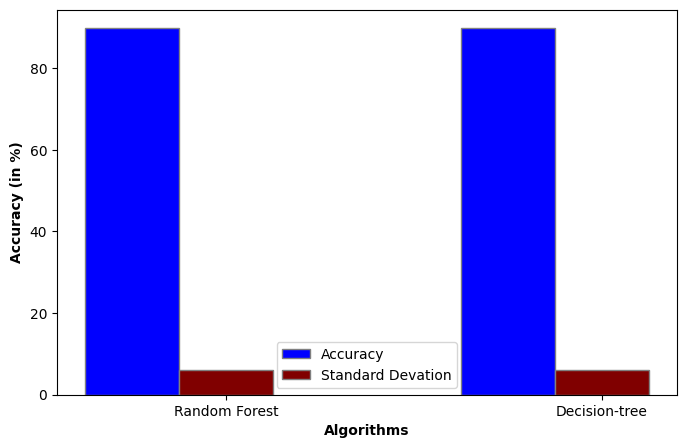

In [57]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 5))
 
# set height of bar
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [a1, a2]
Standard_Deviation = [b1,b2]
 
# Set position of bar on X axis
br1 = np.arange(len(Accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, Accuracy, color ='blue', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plt.bar(br2, Standard_Deviation, color ='maroon', width = barWidth,
        edgecolor ='grey', label ='Standard Devation')
 
# Adding Xticks
plt.xlabel('Algorithms', fontweight ='bold', fontsize = 10)
plt.ylabel('Accuracy (in %)', fontweight ='bold', fontsize = 10)
plt.xticks([r + barWidth for r in range(len(Accuracy))],
        Algorithms)
 
plt.legend()
plt.show()